In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2
# %config InlineBackend.figure_format = 'retina' # I use a HiDPI screen
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_dmeff', 'h',  'n_s', 'A_s', 'tau_reio','sigma_dmeff'])
centers = np.array([0.02222, 0.120, 0.69, 0.966, 2.2e-9, 0.06, 0])
steps = np.array([0.0002, 0.001, 0.007, 0.01, 2e-11, 0.006, 1e-42])

obs_mc = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)

classy_template = {'m_dmeff':1.0,
                   'npow_dmeff':-4,
                   'Vrel_dmeff':0,
                   'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'y' }

classy_template.update(dict(zip(obs_mc.parameters, obs_mc.fiducial)))
obs_mc.compute_cosmo(key='fiducial', classy_dict=classy_template)

for par, par_left, par_right in zip(obs_mc.parameters, obs_mc.left, obs_mc.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs_mc.compute_cosmo(key=par + '_left', classy_dict=classy_left)
    obs_mc.compute_cosmo(key=par + '_right', classy_dict=classy_right)

In [3]:
# create observables for n = 0 cosmology
obs_0 = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)

classy_template_0 = {'m_dmeff':1.0,
                   'npow_dmeff':0,
                   'Vrel_dmeff':0,
                   'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'y' }

classy_template_0.update(dict(zip(obs_0.parameters, obs_0.fiducial)))
obs_0.compute_cosmo(key='fiducial', classy_dict=classy_template_0)

for par, par_left, par_right in zip(obs_0.parameters, obs_0.left, obs_0.right):
    classy_left_0 = classy_template_0.copy()
    classy_left_0[par] = par_left
    classy_right_0 = classy_template_0.copy()
    classy_right_0[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs_0.compute_cosmo(key=par + '_left', classy_dict=classy_left_0)
    obs_0.compute_cosmo(key=par + '_right', classy_dict=classy_right_0)
    
classy_template_0

{'m_dmeff': 1.0,
 'npow_dmeff': 0,
 'Vrel_dmeff': 0,
 'output': 'tCl pCl lCl',
 'l_max_scalars': 2500,
 'lensing': 'y',
 'omega_b': 0.02222,
 'omega_dmeff': 0.12,
 'h': 0.69,
 'n_s': 0.966,
 'A_s': 2.2e-09,
 'tau_reio': 0.06,
 'sigma_dmeff': 0.0}

In [4]:
CMBS4_assumption = CMB_Primary(
    theta_fwhm=[1.5], sigma_T=[1.0], sigma_P=[1.0],
    f_sky=0.4, l_min=300, l_max=2500)
CMBS4_fisher = CMBS4_assumption.get_fisher(obs_0)
CMBS4_cov = np.linalg.inv(CMBS4_fisher)

Planck_assumption = CMB_Primary(
    theta_fwhm=[7.,5.], sigma_T=[43.,66.], sigma_P=[81.,134.],
    f_sky=0.6, l_min=2, l_max=2500)
Planck_fisher = Planck_assumption.get_fisher(obs_mc)
Planck_cov = np.linalg.inv(Planck_fisher)
Planck_fisher_0 = Planck_assumption.get_fisher(obs_0)
Planck_cov_0 = np.linalg.inv(Planck_fisher_0)

generating new axis
['$\\Omega_b$', '$\\Omega_{dmeff}$', '$h$', '$n_s$', '$A_s$', '$\\tau_{reio}$', '$\\sigma_p$']
['$\\Omega_b$', '$\\Omega_{dmeff}$', '$h$', '$n_s$', '$A_s$', '$\\tau_{reio}$', '$\\sigma_p$']


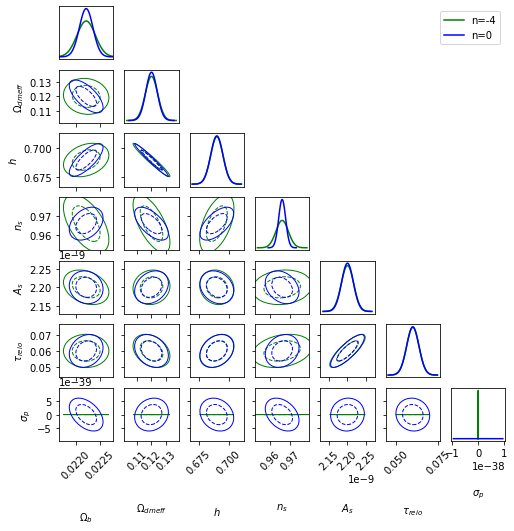

In [5]:
labels = [r'$\Omega_b$', r'$\Omega_{dmeff}$', r'$h$',  r'$n_s$', r'$A_s$', r'$\tau_{reio}$',r'$\sigma_p$']
# now plot Planck
fig, axes = fishchips.util.plot_triangle_base(pars, centers, Planck_cov, labels=labels, 
                                              ellipse_kwargs1={'ls': '--', 'edgecolor': 'green'},
                                              ellipse_kwargs2={'ls': '-', 'edgecolor': 'green'},
                                              color_1d='green');
fishchips.util.plot_triangle_base(pars, centers, Planck_cov_0, 
                                  f=fig, ax=axes, labels=labels,
                                  ellipse_kwargs1={'ls': '--', 'edgecolor': 'blue'},
                                  ellipse_kwargs2={'ls': '-', 'edgecolor': 'blue'},
                                  color_1d='blue'
                                 );

l1, = axes[0, -1].plot([],[],'-',color="green", label='n=-4')
l2, = axes[0, -1].plot([],[],'-',color="blue", label='n=0')
axes[0, -1].legend()
fig.savefig('Comparison between 0 and -4.pdf', format = 'pdf')

Comparison between Planck, SO, Planck+CMB-S4, and maybe Planck+DR4...?

generating new axis
['$\\Omega_b$', '$\\Omega_{dmeff}$', '$h$', '$n_s$', '$A_s$', '$\\tau_{reio}$', '$\\sigma_p$']
['$\\Omega_b$', '$\\Omega_{dmeff}$', '$h$', '$n_s$', '$A_s$', '$\\tau_{reio}$', '$\\sigma_p$']


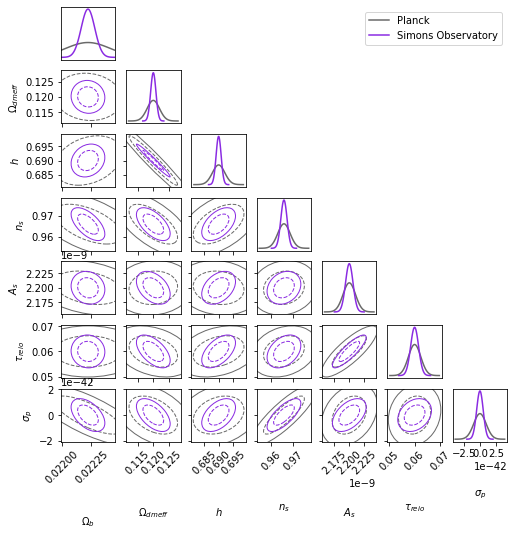

In [6]:
# Planck
fig_2, axes_2 = fishchips.util.plot_triangle_base(pars, centers, Planck_cov, labels=labels, 
                                  ellipse_kwargs1={'ls': '--', 'edgecolor': 'dimgrey'},
                                  ellipse_kwargs2={'ls': '-', 'edgecolor': 'dimgrey'},
                                  color_1d='dimgrey');

# Simons Observatory
Simons_assumption = CMB_Primary(
    theta_fwhm=[1.4], sigma_T=[6.3], sigma_P=[6.3],
    f_sky=0.4, l_min=2, l_max=2500)
Simons_fisher = Simons_assumption.get_fisher(obs_mc)
Simons_cov = np.linalg.inv(Simons_fisher)
fishchips.util.plot_triangle_base(pars, centers, Simons_cov, 
                                  f=fig_2, ax=axes_2,
                                  labels=labels,
                                  ellipse_kwargs1={'ls': '--', 'edgecolor': 'blueviolet'},
                                  ellipse_kwargs2={'ls': '-', 'edgecolor': 'blueviolet'},
                                  color_1d='blueviolet'
                                 );

l1, = axes_2[0, -1].plot([],[],'-',color="dimgrey", label='Planck')
l2, = axes_2[0, -1].plot([],[],'-',color="blueviolet", label='Simons Observatory')
axes_2[0, -1].legend()
fig_2.savefig('Comparison between Planck and SO.pdf', format = 'pdf')

NOW PLOT FIGURE 3 FOR MILLICHARGE (Planck assumption!)

In [46]:
log_of_mass = []
for i in range(1,31):
    log_of_mass.append(i/10)
ls_of_mass = []
for i in log_of_mass:
    ls_of_mass.append(10**i)
    
par = np.array( ['sigma_dmeff'])
center = np.array([0.0])
step = np.array([1e-42])

obs_sigmap = Observables(parameters=par,
                  fiducial=center,
                  left=center-step,
                  right=center+step)

In [50]:
Planck_masses_fisher = []
Planck_masses_inv = []
for i in ls_of_mass:
    classy_template_masses = {'omega_dmeff':0.120,
                   'm_dmeff':i,
                   'npow_dmeff':-4,
                   'Vrel_dmeff':0,
                   'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'y' }
    classy_template_masses.update(dict(zip(obs_sigmap.parameters, obs_sigmap.fiducial)))
    obs_sigmap.compute_cosmo(key='fiducial', classy_dict=classy_template_masses)
    for par, par_left, par_right in zip(obs_sigmap.parameters, obs_sigmap.left, obs_sigmap.right):
        classy_left_m = classy_template_masses.copy()
        classy_left_m[par] = par_left
        classy_right_m = classy_template_masses.copy()
        classy_right_m[par] = par_right
        obs_sigmap.compute_cosmo(key=par + '_left', classy_dict=classy_left_m)
        obs_sigmap.compute_cosmo(key=par + '_right', classy_dict=classy_right_m)
    Planck_masses_fisher = Planck_assumption.get_fisher(obs_sigmap)[0][0]
#   print(Planck_masses_fisher)
    Planck_masses_inv.append(2*(1/Planck_masses_fisher)**(1/2))

print(Planck_masses_inv)

[3.5730979419836756e-43, 4.1031685662712696e-43, 4.768758435209623e-43, 5.60981999052793e-43, 6.6684017407172774e-43, 7.98802375504307e-43, 9.66830481225254e-43, 1.1790758796595268e-42, 1.4421861726394547e-42, 1.7756025703822302e-42, 2.1973576553775046e-42, 2.7289384001755718e-42, 3.3997057548182235e-42, 4.247370709275095e-42, 5.305702559267179e-42, 6.616025941598789e-42, 8.2969034989018e-42, 1.0432075409785649e-41, 1.3110791473262195e-41, 1.6315886390042002e-41, 2.0665133630019328e-41, 2.5773811492724007e-41, 3.25266958374561e-41, 4.051047099061337e-41, 5.026822450011058e-41, 6.536472925022184e-41, 8.299427292442345e-41, 1.0859547596772705e-40, 1.3661436922491002e-40, 1.7267663000965882e-40]


In [54]:
# this is for simons!
SO_masses_fisher = []
SO_masses_inv = []
for i in ls_of_mass:
    classy_template_masses = {'omega_dmeff':0.120,
                   'm_dmeff':i,
                   'npow_dmeff':-4,
                   'Vrel_dmeff':0,
                   'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'y' }
    classy_template_masses.update(dict(zip(obs_sigmap.parameters, obs_sigmap.fiducial)))
    obs_sigmap.compute_cosmo(key='fiducial', classy_dict=classy_template_masses)
    for par, par_left, par_right in zip(obs_sigmap.parameters, obs_sigmap.left, obs_sigmap.right):
        classy_left_m = classy_template_masses.copy()
        classy_left_m[par] = par_left
        classy_right_m = classy_template_masses.copy()
        classy_right_m[par] = par_right
        obs_sigmap.compute_cosmo(key=par + '_left', classy_dict=classy_left_m)
        obs_sigmap.compute_cosmo(key=par + '_right', classy_dict=classy_right_m)
    SO_masses_fisher = Simons_assumption.get_fisher(obs_sigmap)[0][0]
#   print(Planck_masses_fisher)
    SO_masses_inv.append(2*(1/SO_masses_fisher)**(1/2))

In [55]:
CVlimited_assumption = CMB_Primary(
    theta_fwhm=[1.], sigma_T=[0.], sigma_P=[0.],
    f_sky=0.6, l_min=2, l_max=2500)
CVlimited_masses_fisher = []
CVlimited_masses_inv = []
for i in ls_of_mass:
    classy_template_masses = {'omega_dmeff':0.120,
                   'm_dmeff':i,
                   'npow_dmeff':-4,
                   'Vrel_dmeff':0,
                   'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'y' }
    classy_template_masses.update(dict(zip(obs_sigmap.parameters, obs_sigmap.fiducial)))
    obs_sigmap.compute_cosmo(key='fiducial', classy_dict=classy_template_masses)
    for par, par_left, par_right in zip(obs_sigmap.parameters, obs_sigmap.left, obs_sigmap.right):
        classy_left_m = classy_template_masses.copy()
        classy_left_m[par] = par_left
        classy_right_m = classy_template_masses.copy()
        classy_right_m[par] = par_right
        obs_sigmap.compute_cosmo(key=par + '_left', classy_dict=classy_left_m)
        obs_sigmap.compute_cosmo(key=par + '_right', classy_dict=classy_right_m)
    CVlimited_masses_fisher = CVlimited_assumption.get_fisher(obs_sigmap)[0][0]
#   print(Planck_masses_fisher)
    CVlimited_masses_inv.append(2*(1/CVlimited_masses_fisher)**(1/2))

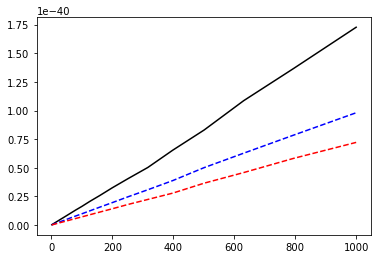

In [56]:
# plot it!
plt.figure(1)
# plt.xlabel(r'$\ell$')
# plt.ylabel(r'% Residual in $C_\ell^\mathrm{TT}$')
plt.plot(ls_of_mass, Planck_masses_inv, color = 'black', linestyle = '-')
plt.plot(ls_of_mass, SO_masses_inv, color = 'blue', linestyle = '--')
plt.plot(ls_of_mass, CVlimited_masses_inv, color = 'red', linestyle = '--')
         # , label = r'$\sigma_\mathrm{p}$')

In [ ]:
\# get Cls 
CL = Class()
CL.set(classy_template)
CL.compute()
fiducial_cls = CL.raw_cl(2500)
fiducial_ll = fiducial_cls['ell'][2:]
fiducial_TT = fiducial_cls['tt'][2:]
fiducial_EE = fiducial_cls['ee'][2:]
fiducial_PP = fiducial_cls['pp'][2:]

# plt.figure(1)
# plt.plot(fiducial_ll, Planck_)
obs_mc.compute_cosmo(key='fiducial', classy_dict=classy_template)